# COMTRADE UN

In [5]:
#### COLAB ONLY CELL
from google.colab import drive
drive.mount('/content/gdrive')
# drive.mount('/content/gdrive',force_remount=True)
%cd /content/gdrive/MyDrive/COMEXT
%pip install -q powerlaw

Mounted at /content/gdrive
/content/gdrive/MyDrive/COMEXT


In [6]:
import hashlib, random, math, os, sys, pickle, time, requests#, powerlaw #,eurostat
import pandas as pd
import numpy as np
import networkx as nx
from tqdm.notebook import tqdm, trange
from networkx.classes.function import degree
import matplotlib.pyplot as plt
from matplotlib import cm

sys.path.append('/content/gdrive/MyDrive/COMEXT/comext_graph_analysis/src')
import graph_analysis as g

In [23]:
import requests
url="http://comtrade.un.org/api/get?\
                         max=10000\
                         &type=C\
                         &freq=M\
                         &px=BEC\
                         &ps=201001\
                         &r=381\
                         &p=699\
                         &rg=all\
                         &cc=AG2\
                         &fmt=json\
                         &head=M".replace(" ","")
un_data = requests.get(url)
print(un_data.status_code)
eval(un_data.content.decode("utf-8").replace("null","''"))

200


{'dataset': [],
 'validation': {'count': {'durationSeconds': 0.0,
   'finished': '0001-01-01T00:00:00',
   'started': '0001-01-01T00:00:00',
   'value': 0},
  'datasetTimer': '',
  'message': '',
  'status': {'category': 0,
   'description': '',
   'helpUrl': 'For more reference visit http://comtrade.un.org/data/dev/portal/',
   'name': 'Ok',
   'value': 0}}}

In [36]:
%%shell
# wget --help
wget -O "./data-samples/comtrade_prova.csv" http://comtrade.un.org/api/get?max=1000&type=C&freq=M&px=BEC&ps=201001&r=381&p=699&rg=all&cc=AG1&fmt=csv&head=M

URL transformed to HTTPS due to an HSTS policy
--2022-06-06 14:13:17--  https://comtrade.un.org/api/get?max=1000
Resolving comtrade.un.org (comtrade.un.org)... 85.159.206.26
Connecting to comtrade.un.org (comtrade.un.org)|85.159.206.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 462 [application/json]
Saving to: ‘./data-samples/comtrade_prova.csv’

./data-samples/comt 100%[===================>]     462  --.-KB/s    in 0s      

2022-06-06 14:13:17 (48.7 MB/s) - ‘./data-samples/comtrade_prova.csv’ saved [462/462]



In [37]:
with open("./data-samples/comtrade_prova.csv","r") as f:
    print(f.read())

{"validation":{"status":{"name":"Ok","value":0,"category":0,"description":"","helpUrl":"For more reference visit http://comtrade.un.org/data/dev/portal/"},"message":null,"count":{"value":0,"started":"2022-06-06T16:10:46.9855098+02:00","finished":"2022-06-06T16:10:47.1587015+02:00","durationSeconds":0.1731917},"datasetTimer":{"started":"2022-06-06T16:10:46.9855098+02:00","finished":"2022-06-06T16:10:47.4100038+02:00","durationSeconds":0.424494}},"dataset":[]}


In [ ]:
# wto_dfs = {y:pd.DataFrame() for y in range(2001,2022)}
# for f in tqdm(os.listdir("./data-samples/wto/bilateral6/")):
#     if "parquet" in f:
#         try:
#             df = pd.read_parquet("./data-samples/wto/bilateral6/"+f)
#         except:
#             print(f)
#         for y in [y for y in range(2001,2022)]:
#             df2 = df[(df.Year == y)][['ReportingEconomyCode','PartnerEconomyCode',
#                     'ProductOrSectorCode', 'UnitCode',
#                     'Year', 'ValueFlagCode', 'Value']].copy()
#             wto_dfs[y] = pd.concat([wto_dfs[y],df2])


  0%|          | 0/1015 [00:00<?, ?it/s]

In [78]:
dacom_ = pd.read_csv("./data-samples/comtrade/DataAvailabilityComtrade_A.csv")
dacom = dacom_[dacom_.px == "H4"]

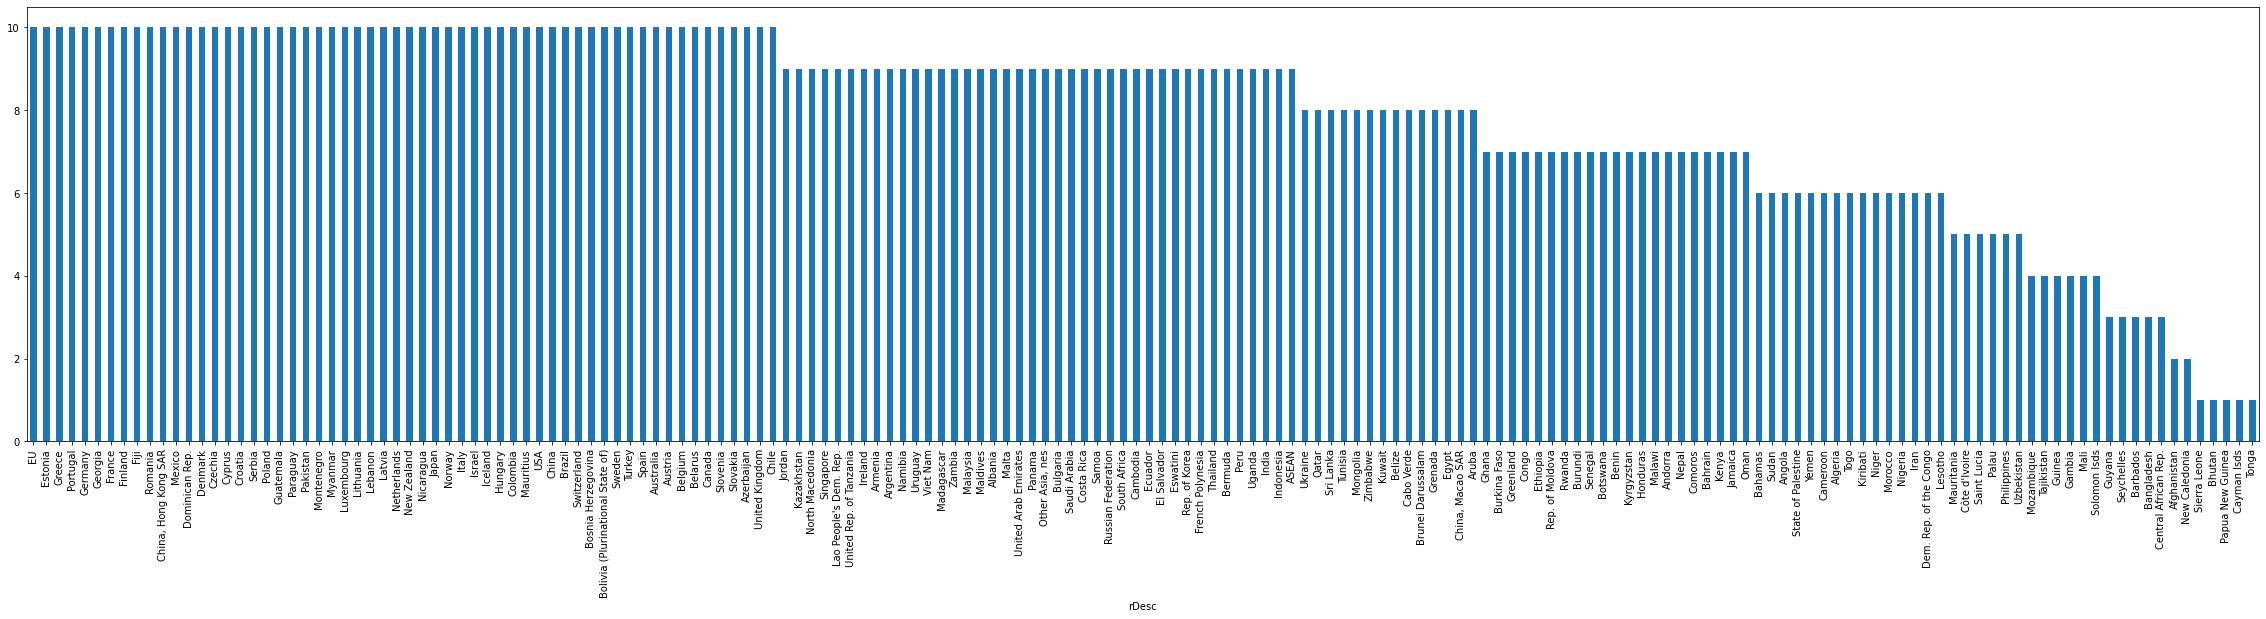

In [79]:
dacom.groupby("rDesc")["ps"].count().sort_values(ascending=False).plot.bar(figsize=(40,8))

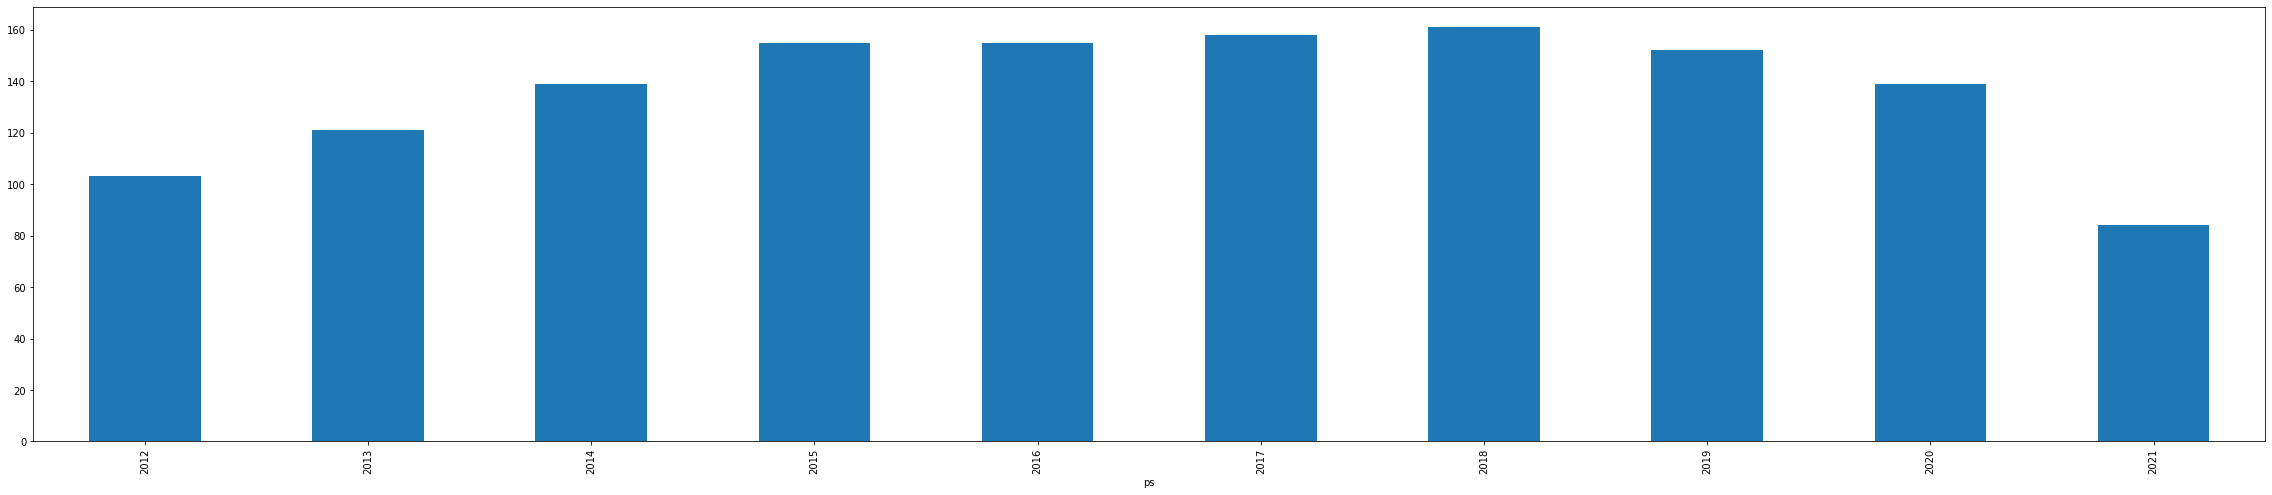

In [80]:
dacom.groupby("ps")["r"].count().plot.bar(figsize=(40,8))

In [77]:
dacom_.px.unique()

array(['H3', 'BEC', 'H0', 'H1', 'H2', 'S1', 'S2', 'S3', 'S4', 'H4', 'H5',
       'HS', 'ST'], dtype=object)